# Project 1

### Import and Clean Data

In [18]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [19]:
# Store filepath in a variable
sleep_file = "Resources/Sleep_Efficiency.csv"
sleep_df = pd.read_csv(sleep_file)

In [20]:
# Show the first five rows.
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [21]:
# Show count of each row to identify missing data
sleep_df.count()

ID                        452
Age                       452
Gender                    452
Bedtime                   452
Wakeup time               452
Sleep duration            452
Sleep efficiency          452
REM sleep percentage      452
Deep sleep percentage     452
Light sleep percentage    452
Awakenings                432
Caffeine consumption      427
Alcohol consumption       438
Smoking status            452
Exercise frequency        446
dtype: int64

In [22]:
# Clean data
clean_sleep = sleep_df.dropna()
clean_sleep

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [23]:
# Show count of each row to confirm data is cleaned
clean_sleep.count()

ID                        388
Age                       388
Gender                    388
Bedtime                   388
Wakeup time               388
Sleep duration            388
Sleep efficiency          388
REM sleep percentage      388
Deep sleep percentage     388
Light sleep percentage    388
Awakenings                388
Caffeine consumption      388
Alcohol consumption       388
Smoking status            388
Exercise frequency        388
dtype: int64

### Create Summary Population Descriptions

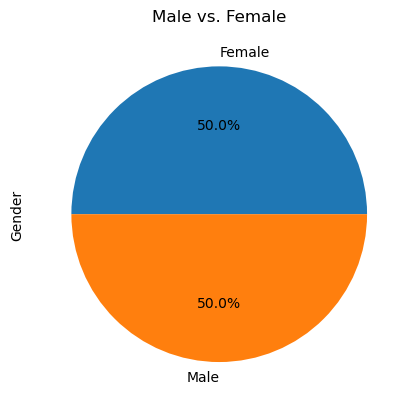

In [24]:
# Population Description - Pie Chart
# Gender
gender_df = clean_sleep.groupby(["Gender"])
gender_counts = gender_df["Gender"].count()
gender_chart = gender_counts.plot(kind="pie", y="Gender",
                                  autopct='%1.1f%%', 
                                  title="Male vs. Female")
plt.show()


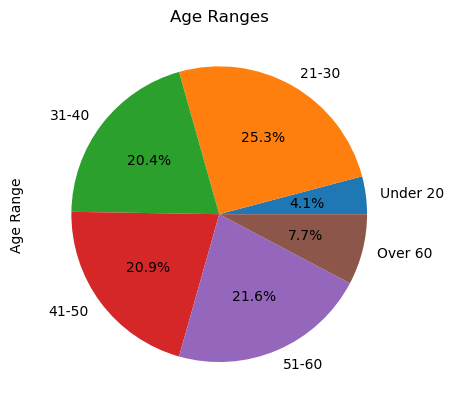

In [25]:
# Population Description - Pie Chart
# Age
# Create bins
age_bins = [0, 20, 30, 40, 50, 60, 70]
labels = ["Under 20", "21-30", "31-40", "41-50", "51-60", "Over 60"]
age_df = clean_sleep.copy()
age_df["Age Range"] = pd.cut(age_df["Age"], age_bins, labels=labels)

# Create chart
age_df = age_df.groupby(["Age Range"])
age_counts = age_df["Age Range"].count()
age_chart = age_counts.plot(kind="pie", y="Age Range",
                        autopct='%1.1f%%',
                        title="Age Ranges")
plt.show()

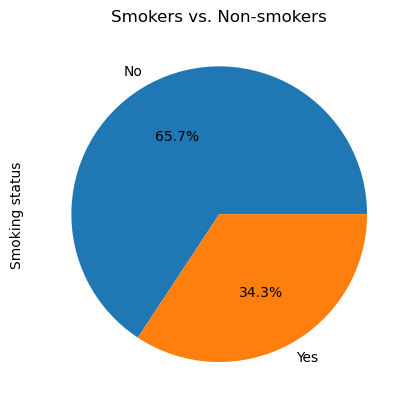

In [26]:
# Population Description - Pie Chart
# Number of Smokers
smoking_count_df = clean_sleep.groupby(["Smoking status"])
smoking_counts = smoking_count_df["Smoking status"].count()
smoking_chart = smoking_counts.plot(kind="pie", y="Smoking status",
                                  autopct='%1.1f%%', 
                                  title="Smokers vs. Non-smokers")
plt.show()


### Summary Findings

In [89]:
# Summary
# Average of all numerical values
clean_sleep.mean(numeric_only=True)


ID                        226.260309
Age                        40.829897
Sleep duration              7.451031
Sleep efficiency            0.789253
REM sleep percentage       22.680412
Deep sleep percentage      52.822165
Light sleep percentage     24.497423
Awakenings                  1.618557
Caffeine consumption       22.680412
Alcohol consumption         1.146907
Exercise frequency          1.757732
dtype: float64

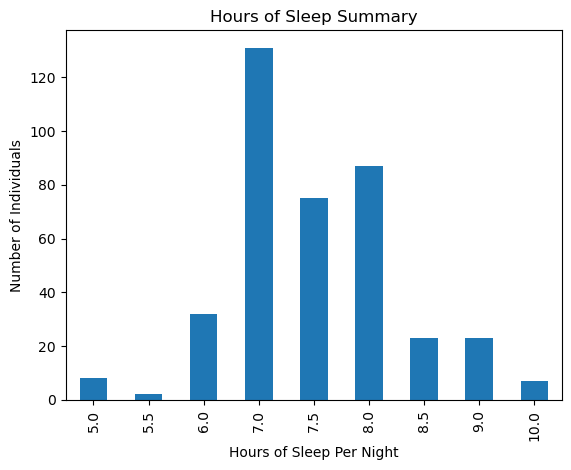

In [28]:
# Summary Findings - Bar Chart
# Hours of Sleep
hours_count = clean_sleep["Sleep duration"].value_counts().sort_index(ascending=True)
awakenings_count_df = pd.DataFrame({"Sleep Duration": hours_count})
awakenings_count_df.plot(kind="bar",
                         xlabel="Hours of Sleep Per Night",
                         ylabel="Number of Individuals",
                         title="Hours of Sleep Summary",
                         legend=False)
plt.show()

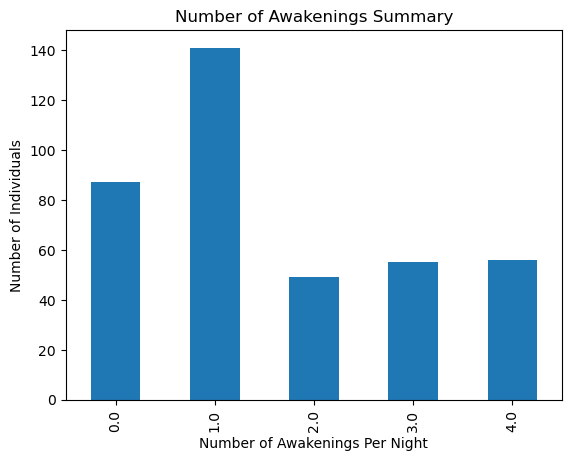

In [90]:
# Summary Findings - Bar Chart
# Awakenings
awakenings_count = clean_sleep["Awakenings"].value_counts().sort_index(ascending=True)
awakenings_count_df = pd.DataFrame({"Awakenings Count": awakenings_count})
awakenings_count_df.plot(kind="bar",
                         xlabel="Number of Awakenings Per Night",
                         ylabel="Number of Individuals",
                         title="Number of Awakenings Summary",
                         legend=False)
plt.show()

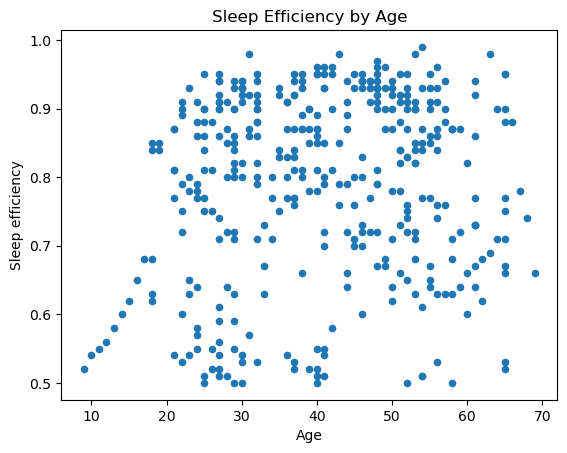

In [74]:
# Scatterplots
# Age vs. Sleep Efficiency
clean_sleep.plot(kind="scatter", x="Age", y="Sleep efficiency",
              title="Sleep Efficiency by Age")
plt.show()

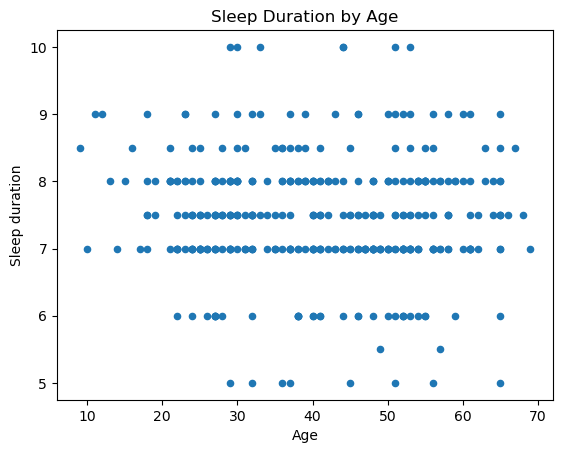

In [91]:
# Scatterplots
# Age vs. Hours of Sleep
clean_sleep.plot(kind="scatter", x="Age", y="Sleep duration",
              title="Sleep Duration by Age")
plt.show()

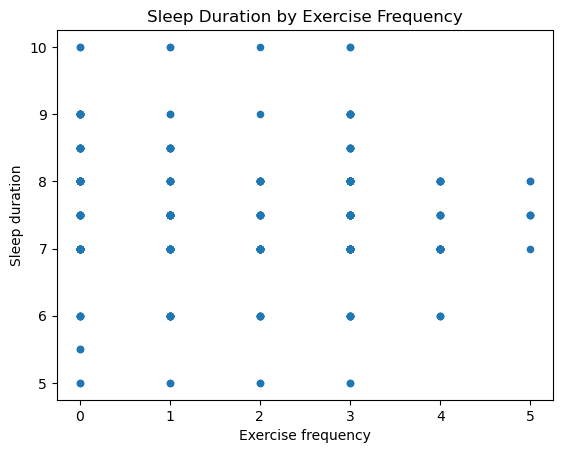

In [92]:
# Scatterplots 
# Exercise vs. Hours of Sleep
clean_sleep.plot(kind="scatter", x="Exercise frequency", y="Sleep duration",
              title="Sleep Duration by Exercise Frequency")
plt.show()

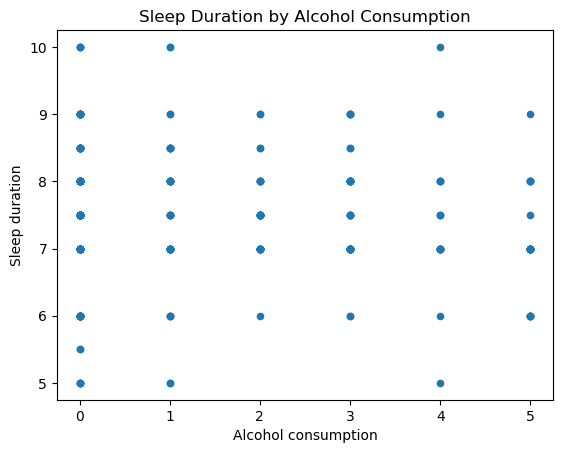

In [93]:
# Scatterplots
# Alcohol Consumption vs. Hours of Sleep
clean_sleep.plot(kind="scatter", x="Alcohol consumption", y="Sleep duration",
              title="Sleep Duration by Alcohol Consumption")
plt.show()

In [34]:
# Create formula to calculate linear regression
def calculate_line(x_values, y_values, x_label, y_label, location):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(location), fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

The correlation between age and sleep efficiency is 0.12


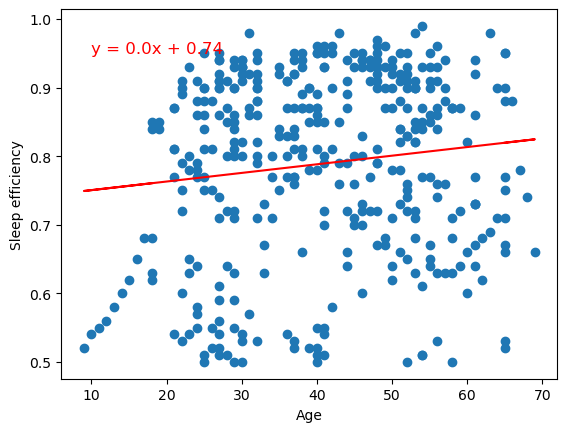

In [73]:
# Calculate correlation between Age and Sleep Efficiency
correlation = st.pearsonr(clean_sleep["Age"], clean_sleep["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between age and sleep efficiency is " + str(corr))
calculate_line(clean_sleep["Age"], clean_sleep["Sleep efficiency"], "Age", "Sleep efficiency", (10,0.95))

The correlation between REM sleep and sleep efficiency is 0.06


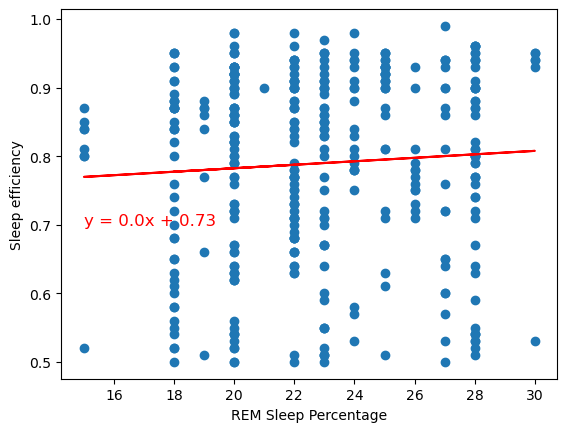

In [95]:
# Calculate correlation between REM Sleep Percentage and Sleep Efficiency
correlation = st.pearsonr(clean_sleep["REM sleep percentage"], clean_sleep["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between REM sleep and sleep efficiency is " + str(corr))
calculate_line(clean_sleep["REM sleep percentage"], clean_sleep["Sleep efficiency"], "REM Sleep Percentage", "Sleep efficiency", (15,.7))

The correlation between Deep sleep and sleep efficiency is 0.79


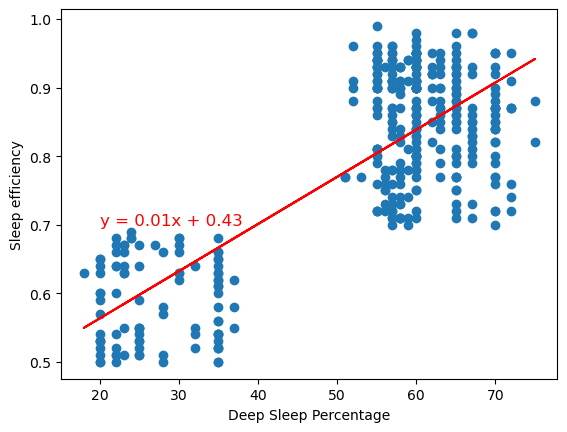

In [96]:
# Calculate correlation between Deep Sleep Percentage and Sleep Efficiency
correlation = st.pearsonr(clean_sleep["Deep sleep percentage"], clean_sleep["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between Deep sleep and sleep efficiency is " + str(corr))
calculate_line(clean_sleep["Deep sleep percentage"], clean_sleep["Sleep efficiency"], "Deep Sleep Percentage", "Sleep efficiency", (20,.7))

The correlation between Light sleep and sleep efficiency is -0.82


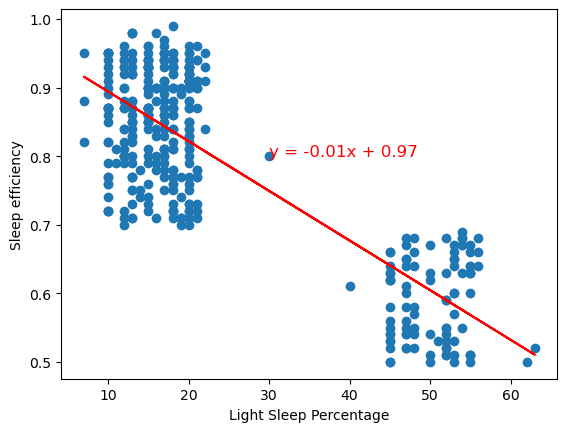

In [97]:
# Calculate correlation between Light Sleep Percentage and Sleep Efficiency
correlation = st.pearsonr(clean_sleep["Light sleep percentage"], clean_sleep["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between Light sleep and sleep efficiency is " + str(corr))
calculate_line(clean_sleep["Light sleep percentage"], clean_sleep["Sleep efficiency"], "Light Sleep Percentage", "Sleep efficiency", (30,.8))

The correlation between Awakenings and deep sleep is -0.33


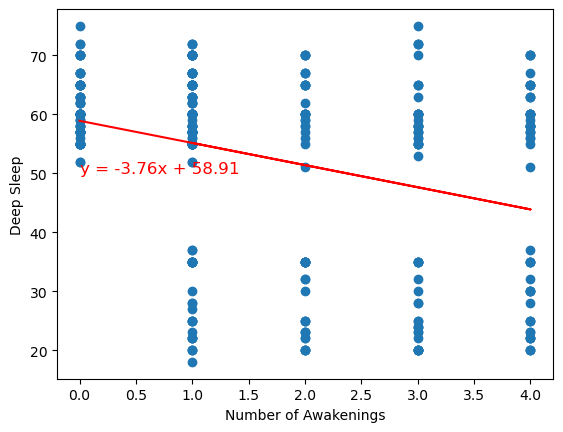

In [103]:
# Calculate correlation between Awakenings and Deep Sleep Percentage
awakening_vs_deep_sleep = clean_sleep[["Awakenings", "Deep sleep percentage"]]
correlation = st.pearsonr(awakening_vs_deep_sleep["Awakenings"], awakening_vs_deep_sleep["Deep sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between Awakenings and deep sleep is " + str(corr))
calculate_line(awakening_vs_deep_sleep["Awakenings"], awakening_vs_deep_sleep["Deep sleep percentage"], "Number of Awakenings", "Deep Sleep", (0,50))

### Impacts of Caffeine

The correlation between Caffeine consumption and deep sleep is -0.02


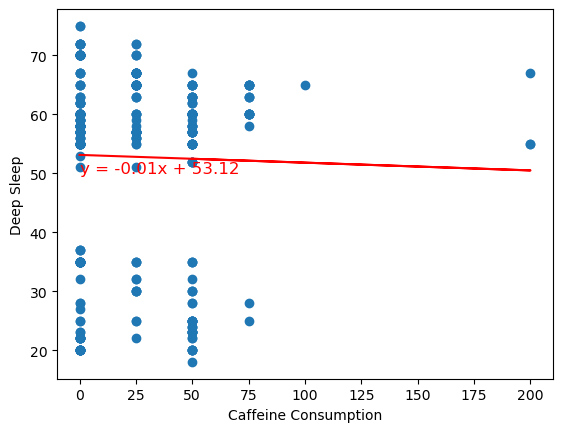

In [102]:
# Calculate correlation between Caffeine and Deep Sleep Percentage
caff_vs_deep_sleep = clean_sleep[["Caffeine consumption", "Deep sleep percentage"]]
correlation = st.pearsonr(caff_vs_deep_sleep["Caffeine consumption"], caff_vs_deep_sleep["Deep sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between Caffeine consumption and deep sleep is " + str(corr))
calculate_line(caff_vs_deep_sleep["Caffeine consumption"], caff_vs_deep_sleep["Deep sleep percentage"], "Caffeine Consumption", "Deep Sleep", (0,50))

The correlation between Caffeine consumption and REM sleep is 0.11


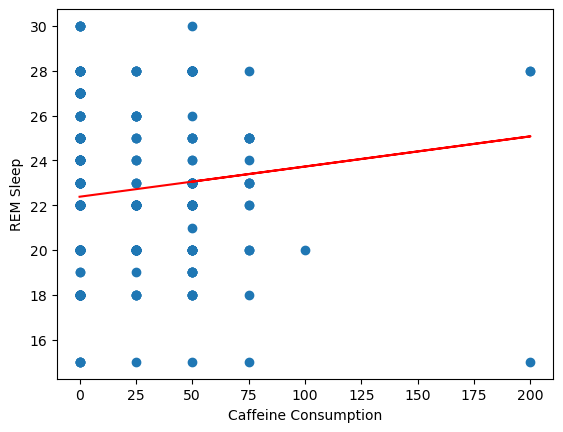

In [101]:
# Calculate correlation between Caffeine and REM Sleep Percentage
caff_vs_REM_sleep = clean_sleep[["Caffeine consumption", "REM sleep percentage"]]
correlation = st.pearsonr(caff_vs_deep_sleep["Caffeine consumption"], caff_vs_REM_sleep["REM sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between Caffeine consumption and REM sleep is " + str(corr))
calculate_line(caff_vs_REM_sleep["Caffeine consumption"], caff_vs_REM_sleep["REM sleep percentage"], "Caffeine Consumption", "REM Sleep", (0,50))

The correlation between Caffeine consumption and sleep efficiency is 0.07


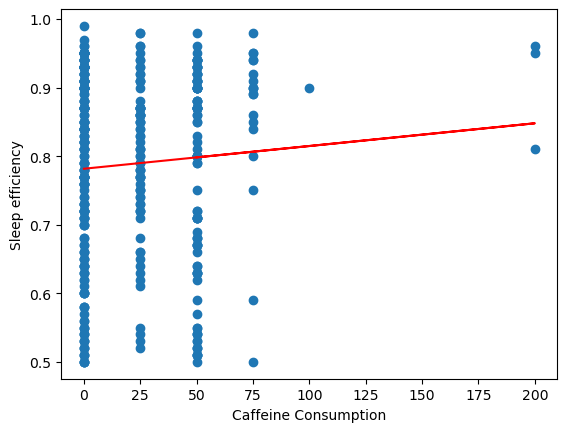

In [104]:
# Calculate correlation between Caffeine and Sleep Efficiency
caff_vs_efficiency = clean_sleep[["Caffeine consumption", "Sleep efficiency"]]
correlation = st.pearsonr(caff_vs_efficiency["Caffeine consumption"], caff_vs_efficiency["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between Caffeine consumption and sleep efficiency is " + str(corr))
calculate_line(caff_vs_efficiency["Caffeine consumption"], caff_vs_efficiency["Sleep efficiency"], "Caffeine Consumption", "Sleep efficiency", (0,50))

### Impacts of Alcohol

The correlation between alcohol consumption and deep sleep is -0.37


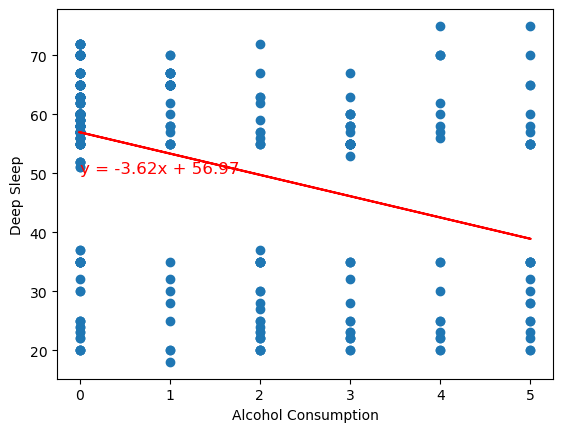

In [106]:
# Calculate correlation between Alcohol and Deep Sleep Percentage
alc_vs_deep_sleep = clean_sleep[["Alcohol consumption", "Deep sleep percentage"]]
correlation = st.pearsonr(alc_vs_deep_sleep["Alcohol consumption"], alc_vs_deep_sleep["Deep sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between alcohol consumption and deep sleep is " + str(corr))
calculate_line(alc_vs_deep_sleep["Alcohol consumption"], alc_vs_deep_sleep["Deep sleep percentage"], "Alcohol Consumption", "Deep Sleep", (0,50))

The correlation between alcohol consumption and REM sleep is -0.04


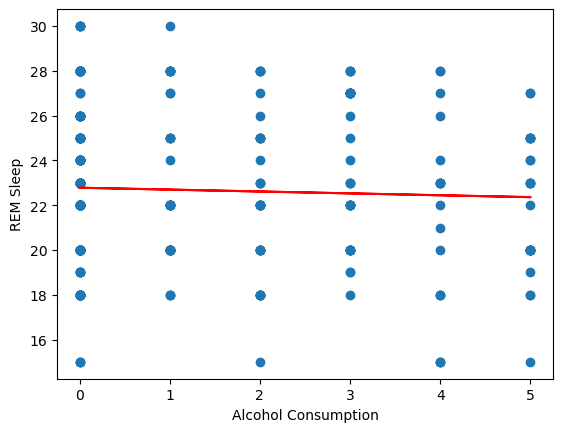

In [107]:
# Calculate correlation between Alcohol and REM Sleep Percentage
alc_vs_REM_sleep = clean_sleep[["Alcohol consumption", "REM sleep percentage"]]
correlation = st.pearsonr(alc_vs_REM_sleep["Alcohol consumption"], alc_vs_REM_sleep["REM sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between alcohol consumption and REM sleep is " + str(corr))
calculate_line(alc_vs_REM_sleep["Alcohol consumption"], alc_vs_REM_sleep["REM sleep percentage"], "Alcohol Consumption", "REM Sleep", (0,50))

The correlation between alcohol consumption and sleep efficiency is -0.4


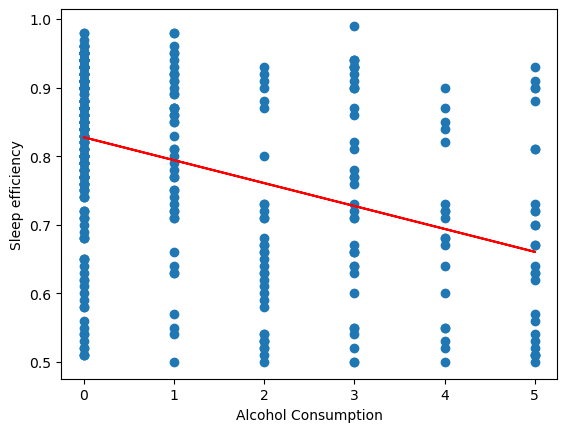

In [108]:
# Calculate correlation between Alcohol and Sleep Efficiency
alc_vs_efficiency = clean_sleep[["Alcohol consumption", "Sleep efficiency"]]
correlation = st.pearsonr(alc_vs_efficiency["Alcohol consumption"], alc_vs_efficiency["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between alcohol consumption and sleep efficiency is " + str(corr))
calculate_line(alc_vs_efficiency["Alcohol consumption"], alc_vs_efficiency["Sleep efficiency"], "Alcohol Consumption", "Sleep efficiency", (0,50))

### Impacts of Exercise

The correlation between exercise and deep sleep is 0.17


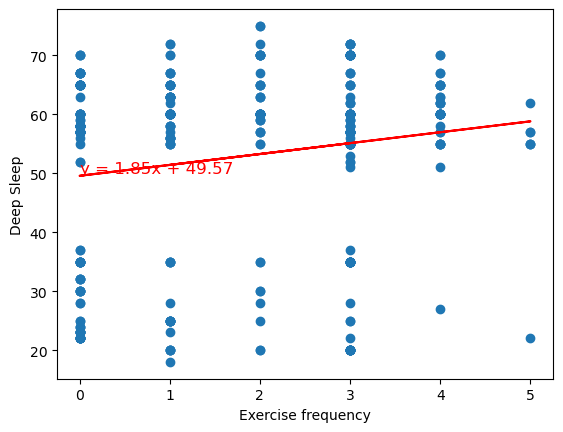

In [109]:
# Calculate correlation between Exercise and Deep Sleep Percentage
ex_vs_deep_sleep = clean_sleep[["Exercise frequency", "Deep sleep percentage"]]
correlation = st.pearsonr(ex_vs_deep_sleep["Exercise frequency"], ex_vs_deep_sleep["Deep sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between exercise and deep sleep is " + str(corr))
calculate_line(ex_vs_deep_sleep["Exercise frequency"], ex_vs_deep_sleep["Deep sleep percentage"], "Exercise frequency", "Deep Sleep", (0,50))

The correlation between exercise and REM sleep is 0.04


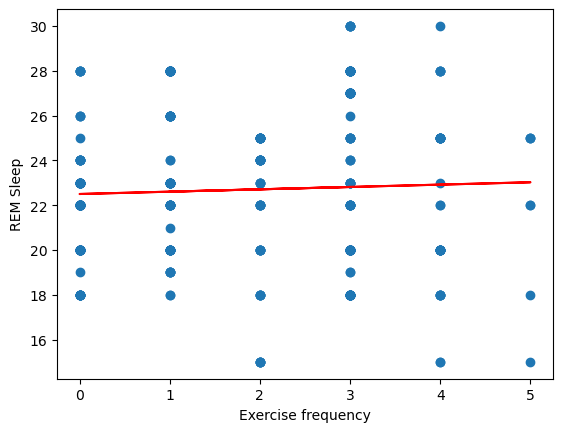

In [110]:
# Calculate correlation between Exercise and REM Sleep Percentage
ex_vs_REM_sleep = clean_sleep[["Exercise frequency", "REM sleep percentage"]]
correlation = st.pearsonr(ex_vs_REM_sleep["Exercise frequency"], ex_vs_REM_sleep["REM sleep percentage"])
corr = round(correlation[0],2)
print("The correlation between exercise and REM sleep is " + str(corr))
calculate_line(ex_vs_REM_sleep["Exercise frequency"], ex_vs_REM_sleep["REM sleep percentage"], "Exercise frequency", "REM Sleep", (0,50))

The correlation between exercise and sleep efficiency is 0.27


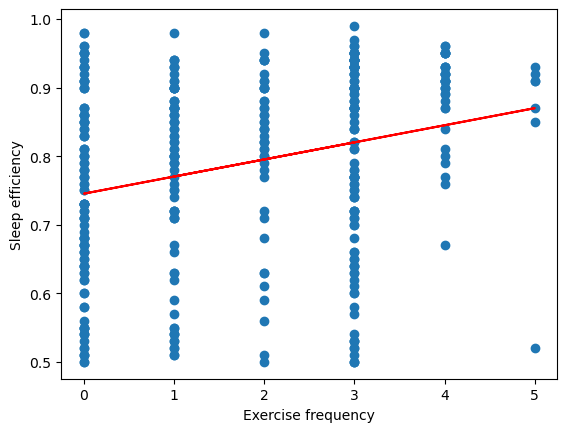

In [111]:
# Calculate correlation between Exercise and Sleep Efficiency
ex_vs_efficiency = clean_sleep[["Exercise frequency", "Sleep efficiency"]]
correlation = st.pearsonr(ex_vs_efficiency["Exercise frequency"], ex_vs_efficiency["Sleep efficiency"])
corr = round(correlation[0],2)
print("The correlation between exercise and sleep efficiency is " + str(corr))
calculate_line(ex_vs_efficiency["Exercise frequency"], ex_vs_efficiency["Sleep efficiency"], "Exercise frequency", "Sleep efficiency", (0,50))

### Impacts of Smoking

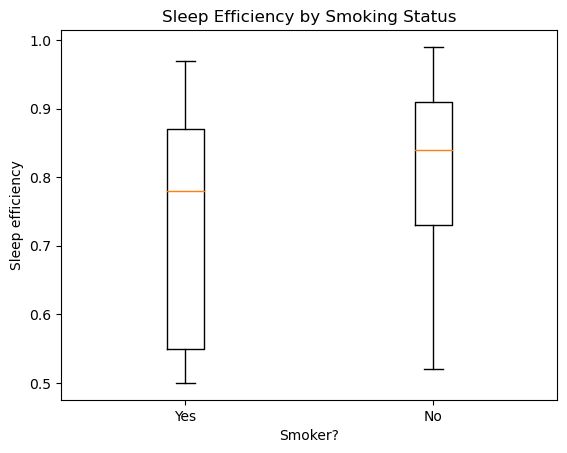

In [112]:
# Sleep efficiency
sleep_eff = []
status = ["Yes", "No"]

for option in status:
    current_df = clean_sleep.loc[clean_sleep["Smoking status"] == option]
    sleep_values = current_df["Sleep efficiency"]
    sleep_eff.append(sleep_values)

plt.boxplot(sleep_eff, labels=status)
plt.xlabel("Smoker?")
plt.ylabel("Sleep efficiency")
plt.title("Sleep Efficiency by Smoking Status")
plt.show()

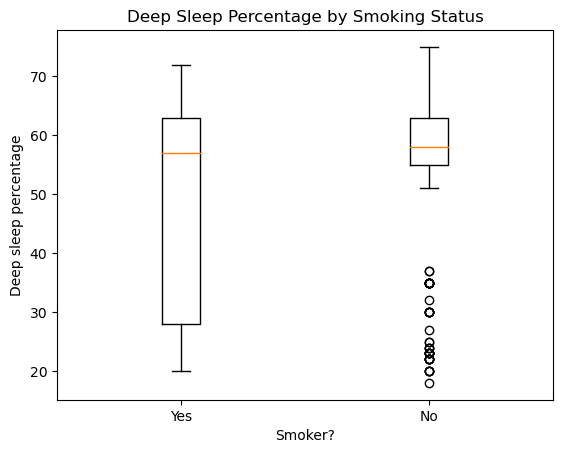

In [113]:
# Deep Sleep
deep_sleep = []
status = ["Yes", "No"]

for option in status:
    current_df = clean_sleep.loc[clean_sleep["Smoking status"] == option]
    sleep_values = current_df["Deep sleep percentage"]
    deep_sleep.append(sleep_values)

plt.boxplot(deep_sleep, labels=status)
plt.xlabel("Smoker?")
plt.ylabel("Deep sleep percentage")
plt.title("Deep Sleep Percentage by Smoking Status")
plt.show()

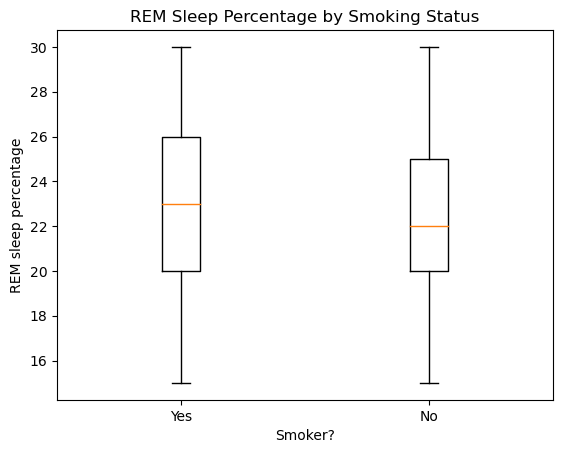

In [114]:
# REM Sleep
REM_sleep = []
status = ["Yes", "No"]

for option in status:
    current_df = clean_sleep.loc[clean_sleep["Smoking status"] == option]
    sleep_values = current_df["REM sleep percentage"]
    REM_sleep.append(sleep_values)

plt.boxplot(REM_sleep, labels=status)
plt.xlabel("Smoker?")
plt.ylabel("REM sleep percentage")
plt.title("REM Sleep Percentage by Smoking Status")
plt.show()

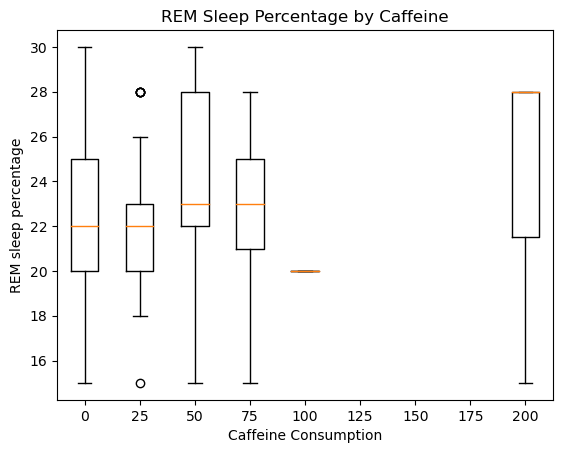

In [115]:
REM_sleep = []
caffeine = [0, 25, 50, 75, 100, 125, 150, 175, 200]

for option in caffeine:
    current_df = clean_sleep.loc[clean_sleep["Caffeine consumption"] == option]
    sleep_values = current_df["REM sleep percentage"]
    REM_sleep.append(sleep_values)

plt.boxplot(REM_sleep, labels=caffeine)
plt.xlabel("Caffeine Consumption")
plt.ylabel("REM sleep percentage")
plt.title("REM Sleep Percentage by Caffeine")
plt.show()

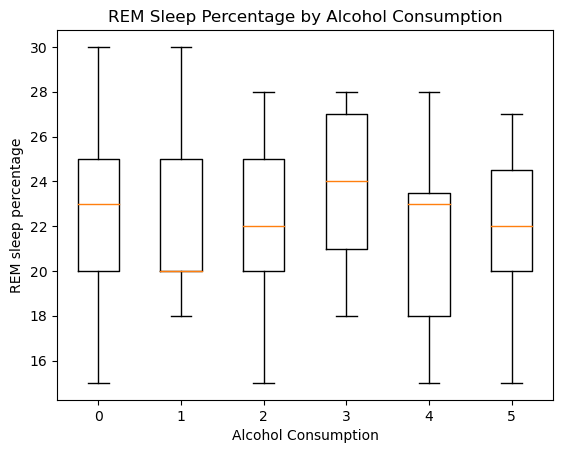

In [116]:
REM_sleep = []
alcohol = [0, 1, 2, 3, 4, 5]

for option in alcohol:
    current_df = clean_sleep.loc[clean_sleep["Alcohol consumption"] == option]
    sleep_values = current_df["REM sleep percentage"]
    REM_sleep.append(sleep_values)

plt.boxplot(REM_sleep, labels=alcohol)
plt.xlabel("Alcohol Consumption")
plt.ylabel("REM sleep percentage")
plt.title("REM Sleep Percentage by Alcohol Consumption")
plt.show()

### Additions

In [120]:
smoking_df = clean_sleep.loc[clean_sleep["Smoking status"] == "Yes"]
nonsmoking_df = clean_sleep.loc[clean_sleep["Smoking status"] == "No"]

In [122]:
age_bins = [0, 20, 30, 40, 50, 60, 70]
labels = ["Under 20", "21-30", "31-40", "41-50", "51-60", "Over 60"]
smoking_df["Age Range"] = pd.cut(smoking_df["Age"], age_bins, labels=labels)
nonsmoking_df["Age Range"] = pd.cut(nonsmoking_df["Age"], age_bins, labels=labels)


C:\Users\pfrie\AppData\Local\Temp\ipykernel_12960\1938527728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_df["Age Range"] = pd.cut(smoking_df["Age"], age_bins, labels=labels)
C:\Users\pfrie\AppData\Local\Temp\ipykernel_12960\1938527728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsmoking_df["Age Range"] = pd.cut(nonsmoking_df["Age"], age_bins, labels=labels)


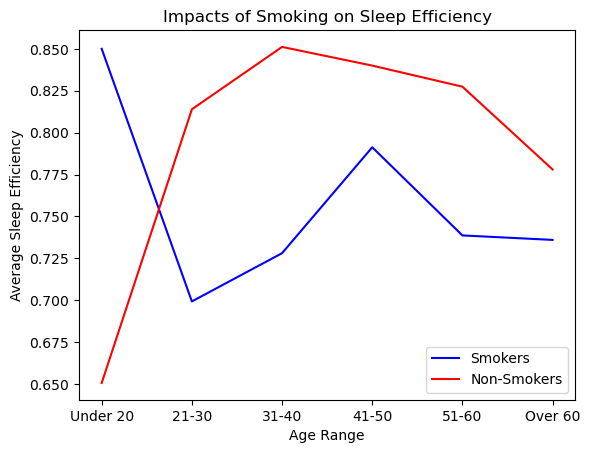

In [123]:
# Create chart
efficiency_smoking = smoking_df.groupby(["Age Range"]).mean()["Sleep efficiency"]
efficiency_nonsmoking = nonsmoking_df.groupby(["Age Range"]).mean()["Sleep efficiency"]
ages = labels
smoking_avg, = plt.plot(ages, efficiency_smoking, color="blue", label="Smokers")
nonsmoking_avg, = plt.plot(ages, efficiency_nonsmoking, color="red", label="Non-Smokers")
plt.legend(handles=[smoking_avg, nonsmoking_avg], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Efficiency")
plt.title("Impacts of Smoking on Sleep Efficiency")

plt.show()

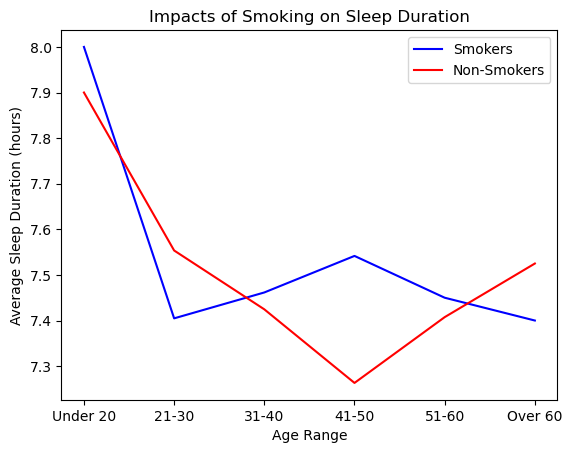

In [124]:
# Create chart
duration_smoking = smoking_df.groupby(["Age Range"]).mean()["Sleep duration"]
duration_nonsmoking = nonsmoking_df.groupby(["Age Range"]).mean()["Sleep duration"]
ages = labels
smoking_avg, = plt.plot(ages, duration_smoking, color="blue", label="Smokers")
nonsmoking_avg, = plt.plot(ages, duration_nonsmoking, color="red", label="Non-Smokers")
plt.legend(handles=[smoking_avg, nonsmoking_avg], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Impacts of Smoking on Sleep Duration")

plt.show()

In [67]:
clean_sleep_df = clean_sleep.copy()
clean_sleep_df["Age Ranges"] = pd.cut(clean_sleep_df["Age"],age_bins,labels=labels,include_lowest=True)
clean_sleep_df


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age Ranges
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Over 60
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Over 60
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,31-40
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,31-40
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0,21-30
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,21-30
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,51-60
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,41-50


<function matplotlib.pyplot.show(close=None, block=None)>

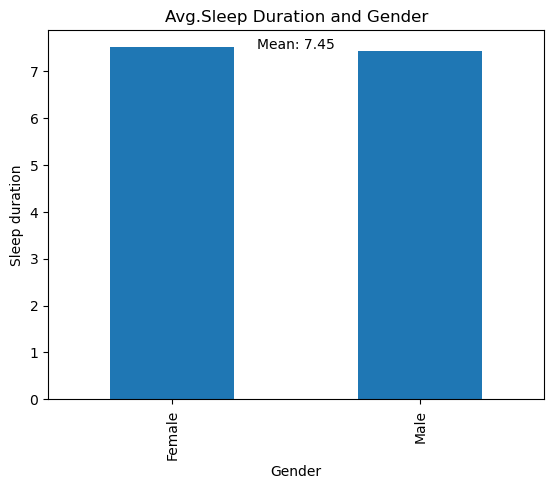

In [68]:
# group the data by age ranges and calculate the mean sleep duration for each group
age_mean = clean_sleep_df.groupby('Gender')['Sleep duration'].mean()

# create the bar chart
Bar_Chart = age_mean.plot(kind='bar', x='Gender', y='Sleep duration', legend=False)

# set the title and axis labels
Bar_Chart.set_title('Avg.Sleep Duration and Gender')
Bar_Chart.set_xlabel('Gender')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(age_mean.mean(), 2)  

# calculate the mean of the mean values
Bar_Chart.annotate(f'Mean: {mean_value}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

plt.show

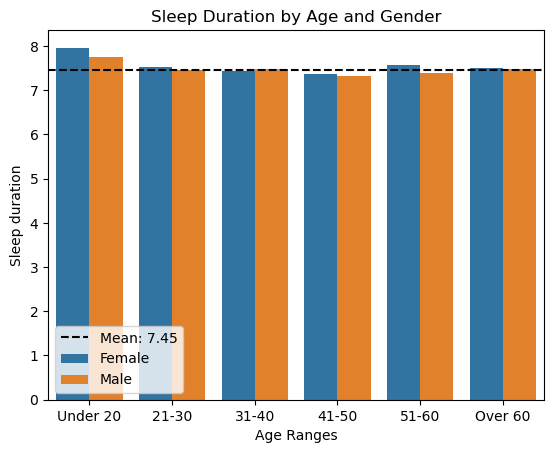

In [69]:
# group the data by age ranges and gender and calculate the mean sleep duration for each group
age_gender_mean = clean_sleep_df.groupby(['Age Ranges', 'Gender'])['Sleep duration'].mean().reset_index()

# create the bar chart
Bar_Chart = sns.barplot(x='Age Ranges', y='Sleep duration', hue='Gender', data=age_gender_mean)

# set the title and axis labels
Bar_Chart.set_title('Sleep Duration by Age and Gender')
Bar_Chart.set_xlabel('Age Ranges')
Bar_Chart.set_ylabel('Sleep duration')

# add the mean value to the chart
mean_value = np.round(clean_sleep_df['Sleep duration'].mean(), 2)  
# calculate the mean of the entire dataset
Bar_Chart.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean: {mean_value}')
Bar_Chart.legend()

# show the plot
plt.show()

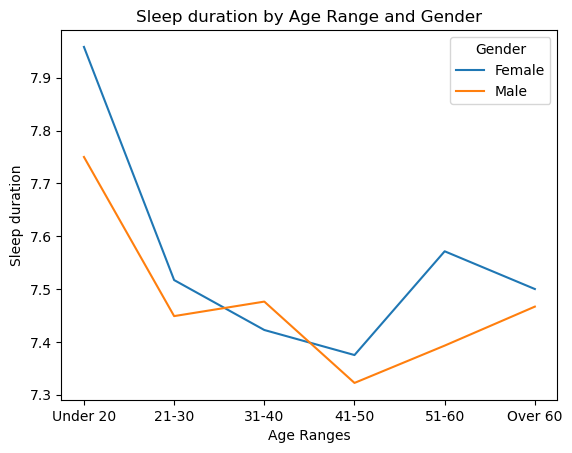

In [70]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Sleep duration', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Sleep duration by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Sleep duration')

# show the plot
plt.show()

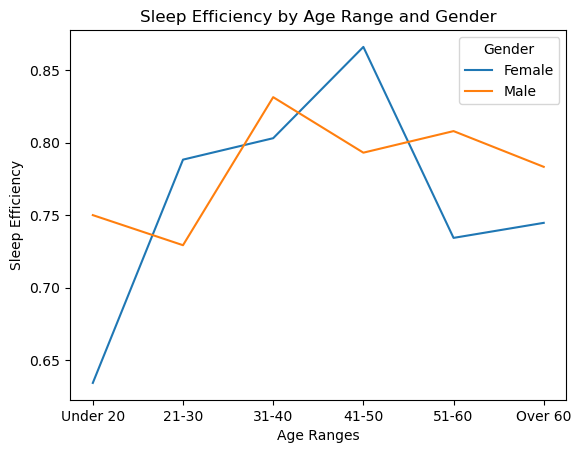

In [71]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Sleep efficiency', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Sleep Efficiency by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Sleep Efficiency')

# show the plot
plt.show()

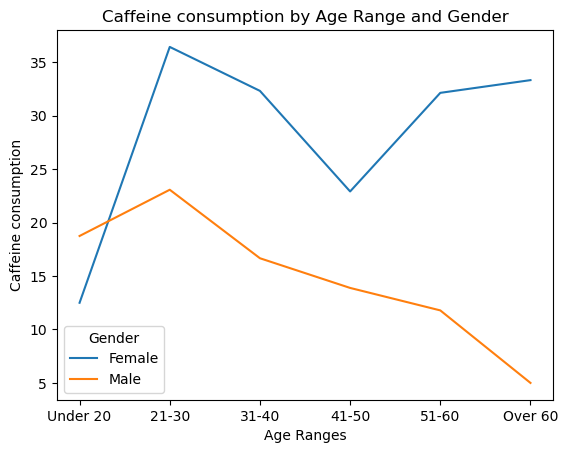

In [72]:
# create a pivot table to calculate the mean sleep efficiency for each age range and gender
sleep_pivot = clean_sleep_df.pivot_table(values='Caffeine consumption', index='Age Ranges', columns='Gender', aggfunc='mean')

# plot the pivot table as a line graph
sleep_pivot.plot(kind='line')

# set the title and axis labels
plt.title('Caffeine consumption by Age Range and Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Caffeine consumption')

# show the plot
plt.show()

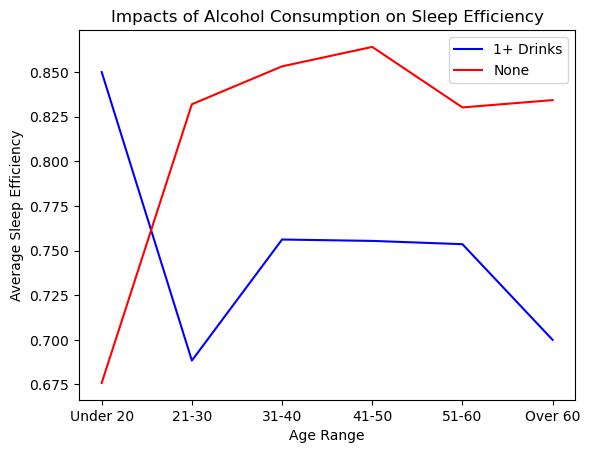

In [85]:
age_df_drink  = sleep_df.loc[sleep_df['Alcohol consumption']  >0].groupby(["Age Range"]).mean()['Sleep efficiency']
age_df_non_drink  = sleep_df.loc[sleep_df['Alcohol consumption']  ==0].groupby(["Age Range"]).mean()['Sleep efficiency']

ages = labels
age_df_drink_graph, = plt.plot(ages, age_df_drink, color="blue", label="1+ Drinks")
nondrink_graph, = plt.plot(ages, age_df_non_drink, color="red", label="None")

plt.legend(handles=[age_df_drink_graph, nondrink_graph], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Efficiency")
plt.title("Impacts of Alcohol Consumption on Sleep Efficiency")

plt.show()


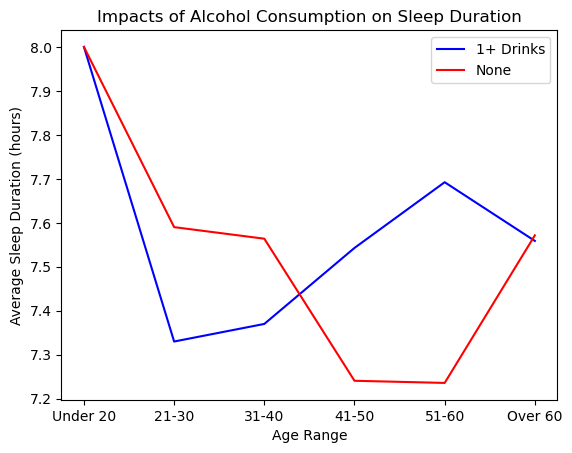

In [88]:
age_df_drink  = sleep_df.loc[sleep_df['Alcohol consumption']  >0].groupby(["Age Range"]).mean()['Sleep duration']
age_df_non_drink  = sleep_df.loc[sleep_df['Alcohol consumption']  ==0].groupby(["Age Range"]).mean()['Sleep duration']

ages = labels
age_df_drink_graph, = plt.plot(ages, age_df_drink, color="blue", label="1+ Drinks")
nondrink_graph, = plt.plot(ages, age_df_non_drink, color="red", label="None")

plt.legend(handles=[age_df_drink_graph, nondrink_graph], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Impacts of Alcohol Consumption on Sleep Duration")

plt.show()

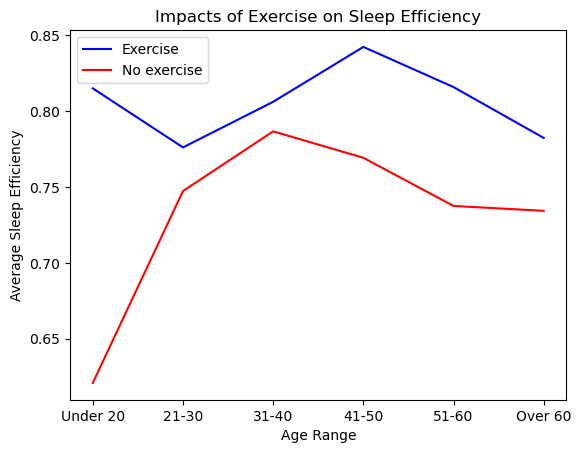

In [82]:
age_df_drink  = sleep_df.loc[sleep_df['Exercise frequency']  >0].groupby(["Age Range"]).mean()['Sleep efficiency']
age_df_non_drink  = sleep_df.loc[sleep_df['Exercise frequency']  ==0].groupby(["Age Range"]).mean()['Sleep efficiency']

ages = labels
age_df_drink_graph, = plt.plot(ages, age_df_drink, color="blue", label="Exercise")
nondrink_graph, = plt.plot(ages, age_df_non_drink, color="red", label="No exercise")

plt.legend(handles=[age_df_drink_graph, nondrink_graph], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Efficiency")
plt.title("Impacts of Exercise on Sleep Efficiency")
plt.show()

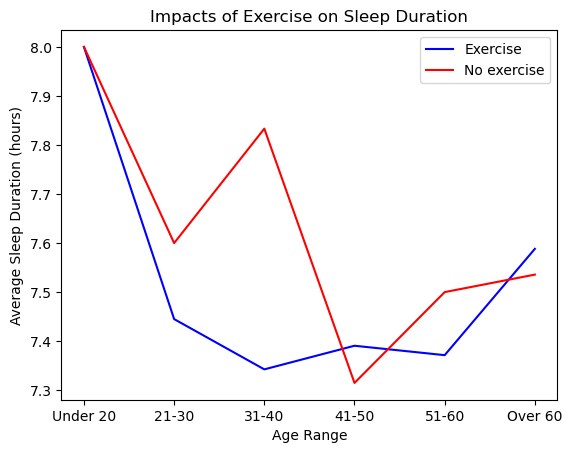

In [83]:
age_df_drink  = sleep_df.loc[sleep_df['Exercise frequency']  >0].groupby(["Age Range"]).mean()['Sleep duration']
age_df_non_drink  = sleep_df.loc[sleep_df['Exercise frequency']  ==0].groupby(["Age Range"]).mean()['Sleep duration']

ages = labels
age_df_drink_graph, = plt.plot(ages, age_df_drink, color="blue", label="Exercise")
nondrink_graph, = plt.plot(ages, age_df_non_drink, color="red", label="No exercise")

plt.legend(handles=[age_df_drink_graph, nondrink_graph], loc="best")
plt.xlabel("Age Range")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Impacts of Exercise on Sleep Duration")

plt.show()